In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_system_data(system, window=100, figsize=(10, 8)):
    """
    Plot and save time series data with moving averages for a given system.
    
    :param system: String identifier for the system (used for file naming)
    :param window: Size of the moving average window
    :param figsize: Size of the figure (width, height)
    """
    def plot_with_moving_average(ax, df, x_column, y_column):
        """
        Plot original data and its moving average on a given axis.
        """
        ax.plot(df[x_column], df[y_column], label='Original', alpha=0.5)
        rolling_mean = df[y_column].rolling(window=window, center=True, min_periods=1).mean()
        ax.plot(df[x_column], rolling_mean, label=f'Moving Average (window={window})', color='red')
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)
        ax.legend()

    # Read the CSV file
    file_path = f"{system}.out"
    try:
        df = pd.read_csv(file_path, sep=',')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return

    # Get column names for indices 3, 4, 5, 6
    columns_to_plot = ["Potential Energy (kB*T)","Kinetic Energy (kB*T)","Total Energy (kB*T)","Temperature (K)","Box Volume (nm^3)","Density (g/mL)"]

    print('All columns in the data:', df.columns)

    # convert to kBT
    T = df['Temperature (K)']
    kB = 1.38064852e-23
    mol = 6.02214076e23
    df["Potential Energy (kB*T)"] = df["Potential Energy (kJ/mole)"] * 1000 / (mol * kB * T)
    df["Kinetic Energy (kB*T)"] = df["Kinetic Energy (kJ/mole)"] * 1000 / (mol * kB * T)
    df["Total Energy (kB*T)"] = df["Total Energy (kJ/mole)"] * 1000 / (mol * kB * T)

    # Create a single figure with four subfigures
    fig, axs = plt.subplots(3, 2, figsize=figsize)
    fig.suptitle(f'System: {system}', fontsize=16)

    # Flatten the 2x2 array of axes for easier iteration
    axs = axs.flatten()

    # Plot for each specified column
    for i, column in enumerate(columns_to_plot):
        plot_with_moving_average(axs[i], df, 'Time (ps)', column)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap

    # change DPI to 300 for showing in the notebook

    # Save the figure
    # get the output dir from the same dir as the original
    # extract from file_path the directory
    # output_dir = "/".join(file_path.split("/")[0:-2])
    # if not os.path.exists(output_dir):
    #     os.makedirs(output_dir)
    # output_file = os.path.join(output_dir, f"{system}_plot.png")
    plt.savefig('tmp/tmp.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()  # Close the figure to free up memory

    # print(f"Plot saved as {output_file}")

All columns in the data: Index(['#"Progress (%)"', 'Step', 'Time (ps)', 'Potential Energy (kJ/mole)',
       'Kinetic Energy (kJ/mole)', 'Total Energy (kJ/mole)', 'Temperature (K)',
       'Box Volume (nm^3)', 'Density (g/mL)', 'Speed (ns/day)',
       'Time Remaining'],
      dtype='object')


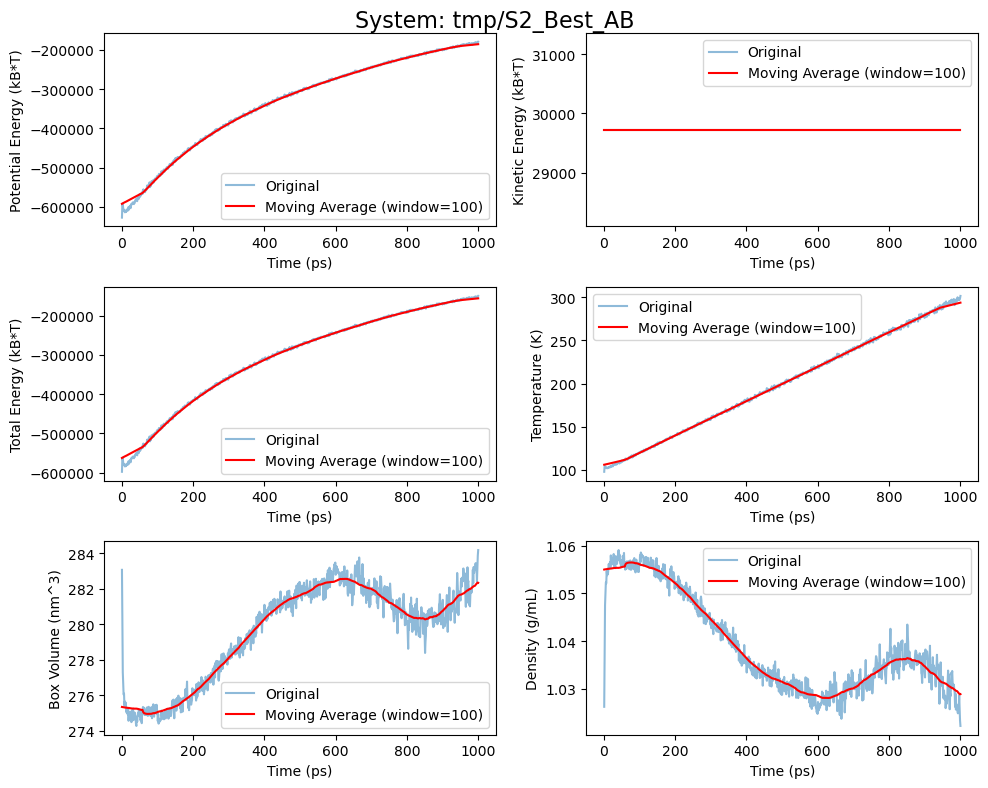

In [41]:
plot_system_data('tmp/S2_Best_AB')

In [2]:
plot_system_data("S1_Best_A")
plot_system_data("S1_Best_AB")
plot_system_data("S2_Best_A")
plot_system_data("S2_Best_AB")

Plot saved as output/S1_Best_A_plot.png
Plot saved as output/S1_Best_AB_plot.png
Plot saved as output/S2_Best_A_plot.png
Plot saved as output/S2_Best_AB_plot.png


In [3]:
plot_system_data("S1_Best_AB_240723_200344")

Plot saved as output/S1_Best_AB_240723_200344_plot.png


In [2]:
import os
import imageio
from PIL import Image

def create_gif_from_pngs(input_folder, output_gif, duration=0.5, loop=0, compress_factor=0.5):
    """
    Create a compressed GIF from all PNG files in a folder.
    
    :param input_folder: Path to the folder containing PNG files
    :param output_gif: Path and filename for the output GIF
    :param duration: Duration of each frame in seconds (default: 0.5)
    :param loop: Number of times to loop the GIF. 0 means loop forever (default: 0)
    :param compress_factor: Factor to resize images for compression (default: 0.5)
    """
    # Get all PNG files in the input folder
    png_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.png')]
    png_files.sort()  # Sort files to ensure correct order

    images = []
    for png_file in png_files:
        file_path = os.path.join(input_folder, png_file)
        # Open the image and resize it for compression
        with Image.open(file_path) as img:
            # Calculate new size
            new_size = (int(img.width * compress_factor), int(img.height * compress_factor))
            # Resize the image
            img_resized = img.resize(new_size, Image.LANCZOS)
            # Convert to RGB mode if it's not already
            if img_resized.mode != 'RGB':
                img_resized = img_resized.convert('RGB')
            # Append to the list
            images.append(img_resized)

    # Save as GIF
    imageio.mimsave(output_gif, images, duration=duration, loop=loop)
    print(f"GIF created and saved as {output_gif}")

# Example usage
input_folder = '/Users/jakublala/Downloads/output 6/movie'
output_gif = '/Users/jakublala/Downloads/output 6/animated.gif'
create_gif_from_pngs(input_folder, output_gif)

GIF created and saved as /Users/jakublala/Downloads/output 6/animated.gif


All columns in the data: Index(['#"Progress (%)"', 'Step', 'Time (ps)', 'Potential Energy (kJ/mole)',
       'Kinetic Energy (kJ/mole)', 'Total Energy (kJ/mole)', 'Temperature (K)',
       'Box Volume (nm^3)', 'Density (g/mL)', 'Speed (ns/day)',
       'Time Remaining'],
      dtype='object')


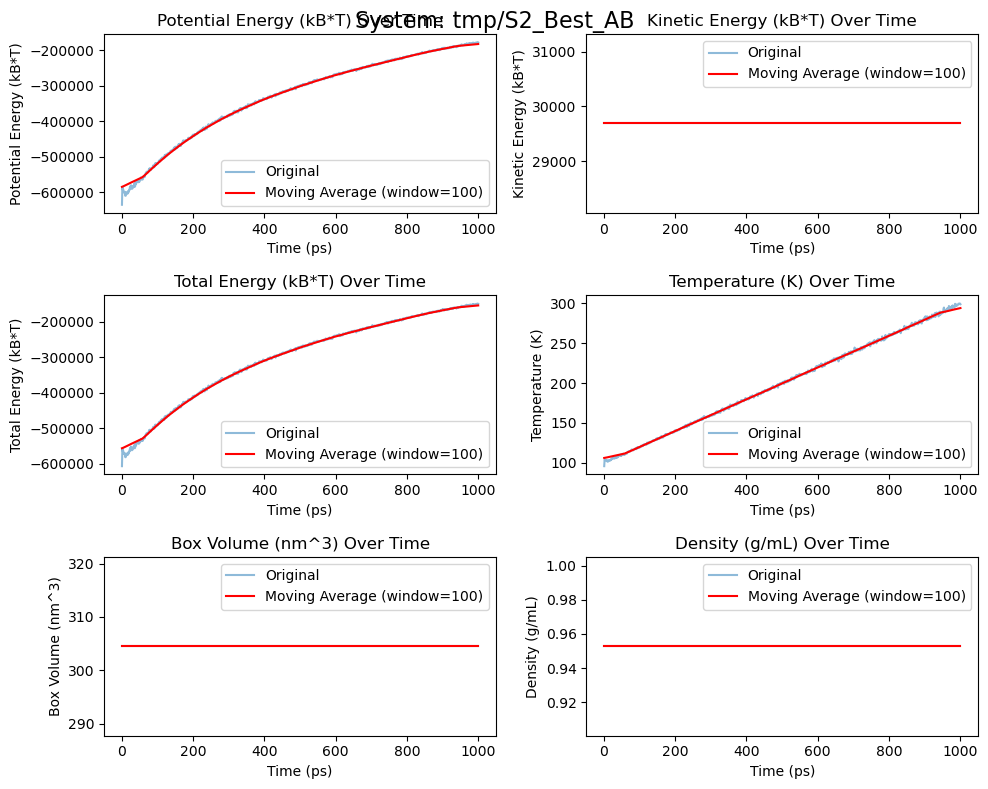